In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from nltk.stem.porter import PorterStemmer 
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score 
from wordcloud import WordCloud 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
import pickle 
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Analysis

In [7]:
data = pd.read_csv("amazon_alexa.tsv", delimiter="\t" , quoting=3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
data.shape

(3150, 5)

In [9]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [10]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [14]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [19]:
data["rating"].value_counts().sort_values(ascending=False)

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

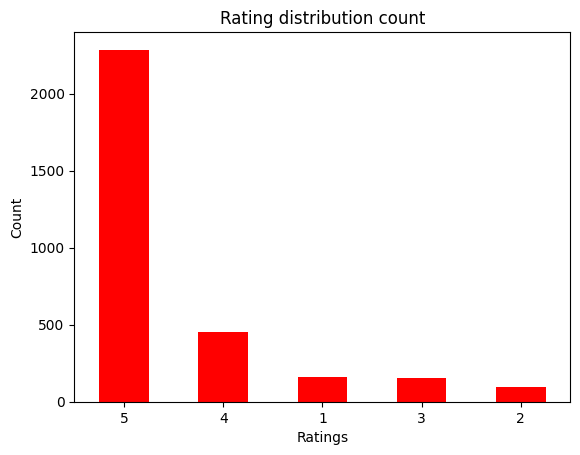

In [21]:
data["rating"].value_counts().sort_values(ascending=False).plot(kind="bar", color="red")
plt.title("Rating distribution count")
plt.xticks(rotation=0)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


In [23]:
# Rating in percentage 
round((data["rating"].value_counts()/data.shape[0])*100,2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64

<Axes: ylabel='count'>

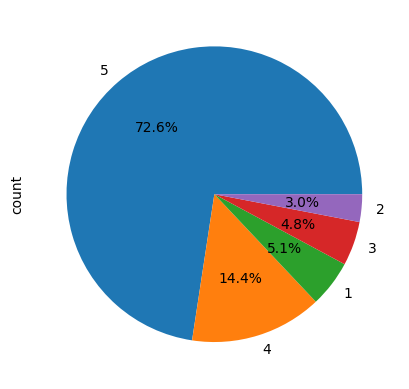

In [26]:
# Rating in percentage 
round((data["rating"].value_counts()/data.shape[0])*100,2).plot(kind="pie",autopct="%1.1f%%" )